In [242]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [244]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("sklearn",sklearn.__version__)

numpy 2.0.2
pandas 2.2.2
sklearn 1.6.1


In [245]:
data = pd.read_csv('/content/drive/MyDrive/ML learning/Fuel Cosumption - Sheet1.csv')

In [246]:
data

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [247]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB
None


In [248]:
print(data.isna())

      Year   MAKE  MODEL  VEHICLE CLASS  ENGINE SIZE  CYLINDERS  TRANSMISSION  \
0    False  False  False          False        False      False         False   
1    False  False  False          False        False      False         False   
2    False  False  False          False        False      False         False   
3    False  False  False          False        False      False         False   
4    False  False  False          False        False      False         False   
..     ...    ...    ...            ...          ...        ...           ...   
634  False  False  False          False        False      False         False   
635  False  False  False          False        False      False         False   
636  False  False  False          False        False      False         False   
637  False  False  False          False        False      False         False   
638  False  False  False          False        False      False         False   

      FUEL  FUEL CONSUMPTIO

In [249]:
print(data.isnull().sum())

Year                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64


In [250]:
print("Duplicate rows:",data.duplicated().sum())

Duplicate rows: 1


In [251]:
data = data.drop_duplicates()


In [252]:
print("Duplicate rows after cleaning:", data.duplicated().sum())


Duplicate rows after cleaning: 0


In [253]:
print(data.describe())

         Year  ENGINE SIZE   CYLINDERS  FUEL CONSUMPTION  COEMISSIONS
count   638.0   638.000000  638.000000        638.000000   638.000000
mean   2000.0     3.264577    5.802508         14.705956   296.642633
std       0.0     1.231634    1.624535          3.303962    65.420203
min    2000.0     1.000000    3.000000          4.900000   104.000000
25%    2000.0     2.200000    4.000000         12.500000   253.000000
50%    2000.0     3.000000    6.000000         14.400000   288.000000
75%    2000.0     4.300000    6.000000         16.600000   343.000000
max    2000.0     8.000000   12.000000         30.200000   582.000000


In [254]:
print(data.describe(include=[object]))


             MAKE MODEL VEHICLE CLASS TRANSMISSION FUEL
count         638   638           638          638  638
unique         36   328            14            8    5
top     CHEVROLET    LS       COMPACT           A4    X
freq           63     6           105          323  454


In [255]:
print("Unique values in each column:")
for col in data.columns:
    print(col, ":", data[col].nunique())

Unique values in each column:
Year : 1
MAKE : 36
MODEL : 328
VEHICLE CLASS : 14
ENGINE SIZE : 40
CYLINDERS : 7
TRANSMISSION : 8
FUEL : 5
FUEL CONSUMPTION : 124
COEMISSIONS : 116


In [256]:
for col in data.columns:
    print("Value counts for ")
    print(data[col].value_counts())
    print("--------------------------------------------------")


Value counts for 
Year
2000    638
Name: count, dtype: int64
--------------------------------------------------
Value counts for 
MAKE
CHEVROLET        63
FORD             62
DODGE            46
TOYOTA           43
GMC              38
VOLKSWAGEN       36
BMW              29
AUDI             22
MERCEDES-BENZ    22
PONTIAC          21
VOLVO            21
MAZDA            20
CHRYSLER         19
NISSAN           19
HONDA            17
SATURN           15
SUZUKI           13
SUBARU           12
DAEWOO           10
HYUNDAI          10
JAGUAR           10
ACURA             9
SAAB              9
ISUZU             8
PORSCHE           8
JEEP              8
LEXUS             7
FERRARI           7
BUICK             6
LINCOLN           6
OLDSMOBILE        5
CADILLAC          5
INFINITI          4
KIA               4
LAND ROVER        3
PLYMOUTH          1
Name: count, dtype: int64
--------------------------------------------------
Value counts for 
MODEL
LS                     6
JETTA              

In [257]:
num_cols = data.select_dtypes(include="number").columns
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((data[col] < lower) | (data[col] > upper)).sum()
    print(col ,":", outliers ,"outliers")


Year : 0 outliers
ENGINE SIZE : 2 outliers
CYLINDERS : 9 outliers
FUEL CONSUMPTION : 8 outliers
COEMISSIONS : 6 outliers


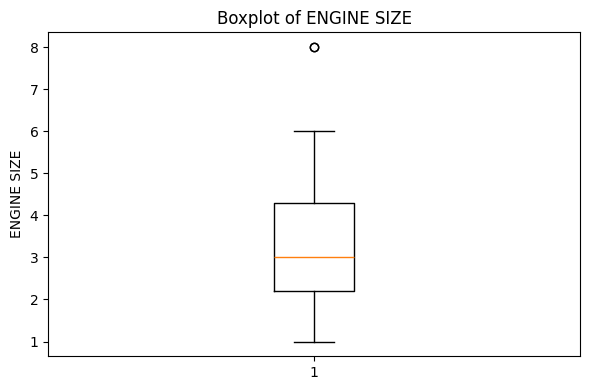

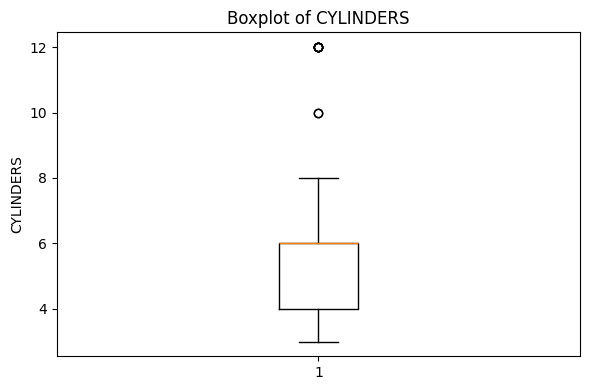

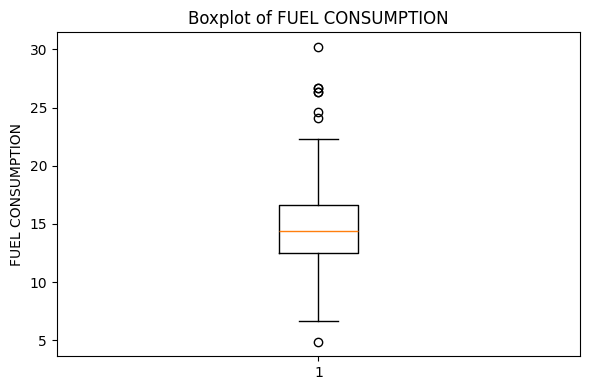

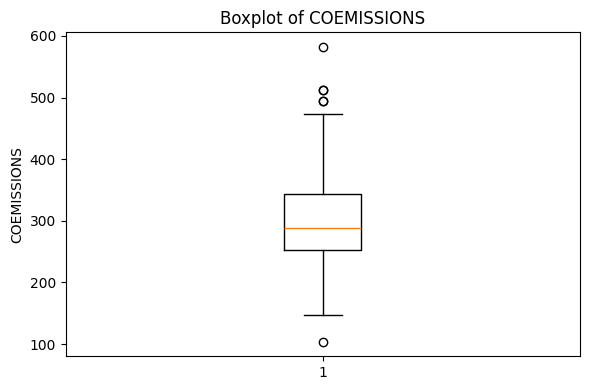

In [258]:
for col in ['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS']:
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[col])
    plt.title('Boxplot of ' + col)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [259]:
key_cols = ['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS']

for col in key_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = len(data)
    data = data[(data[col] >= lower) & (data[col] <= upper)]
    removed = before - len(data)
    print(f"{col}: Removed {removed} outliers")

ENGINE SIZE: Removed 2 outliers
CYLINDERS: Removed 7 outliers
FUEL CONSUMPTION: Removed 3 outliers
COEMISSIONS: Removed 0 outliers


In [260]:
num_cols = data.select_dtypes(include="number").columns
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((data[col] < lower) | (data[col] > upper)).sum()
    print(col ,":", outliers ,"outliers")


Year : 0 outliers
ENGINE SIZE : 0 outliers
CYLINDERS : 0 outliers
FUEL CONSUMPTION : 0 outliers
COEMISSIONS : 0 outliers


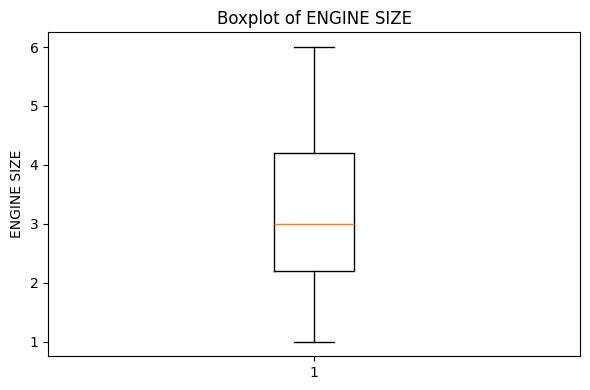

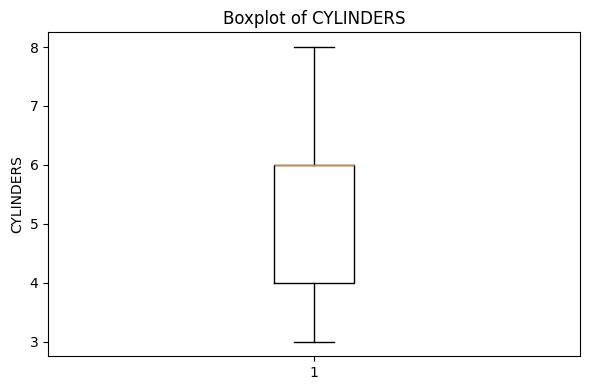

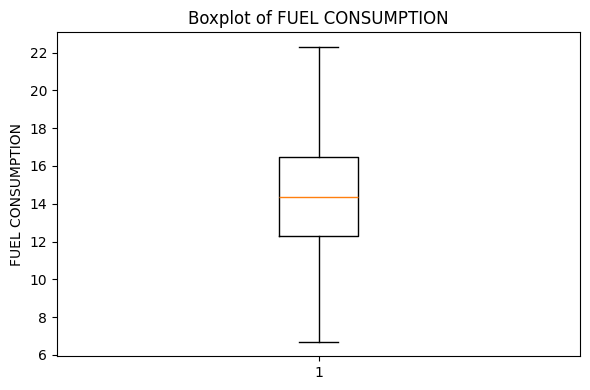

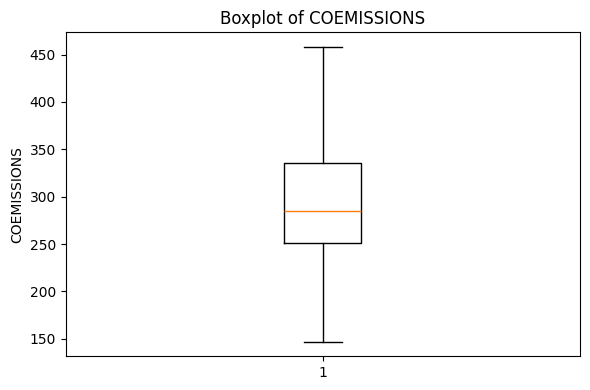

In [261]:
for col in ['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS']:
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[col])
    plt.title('Boxplot of ' + col)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [262]:
data['ENGINE_CYLINDER_RATIO'] = data['ENGINE SIZE'] / data['CYLINDERS']
data['POWER_INDICATOR'] = data['ENGINE SIZE'] * data['CYLINDERS']

In [263]:
print("Correlation matrix:")
print(data.corr(numeric_only=True))

Correlation matrix:
                       Year  ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  \
Year                    NaN          NaN        NaN               NaN   
ENGINE SIZE             NaN     1.000000   0.908022          0.876774   
CYLINDERS               NaN     0.908022   1.000000          0.803854   
FUEL CONSUMPTION        NaN     0.876774   0.803854          1.000000   
COEMISSIONS             NaN     0.864975   0.777821          0.981534   
ENGINE_CYLINDER_RATIO   NaN     0.779577   0.462413          0.695353   
POWER_INDICATOR         NaN     0.979680   0.953291          0.845712   

                       COEMISSIONS  ENGINE_CYLINDER_RATIO  POWER_INDICATOR  
Year                           NaN                    NaN              NaN  
ENGINE SIZE               0.864975               0.779577         0.979680  
CYLINDERS                 0.777821               0.462413         0.953291  
FUEL CONSUMPTION          0.981534               0.695353         0.845712  
COEMISSION

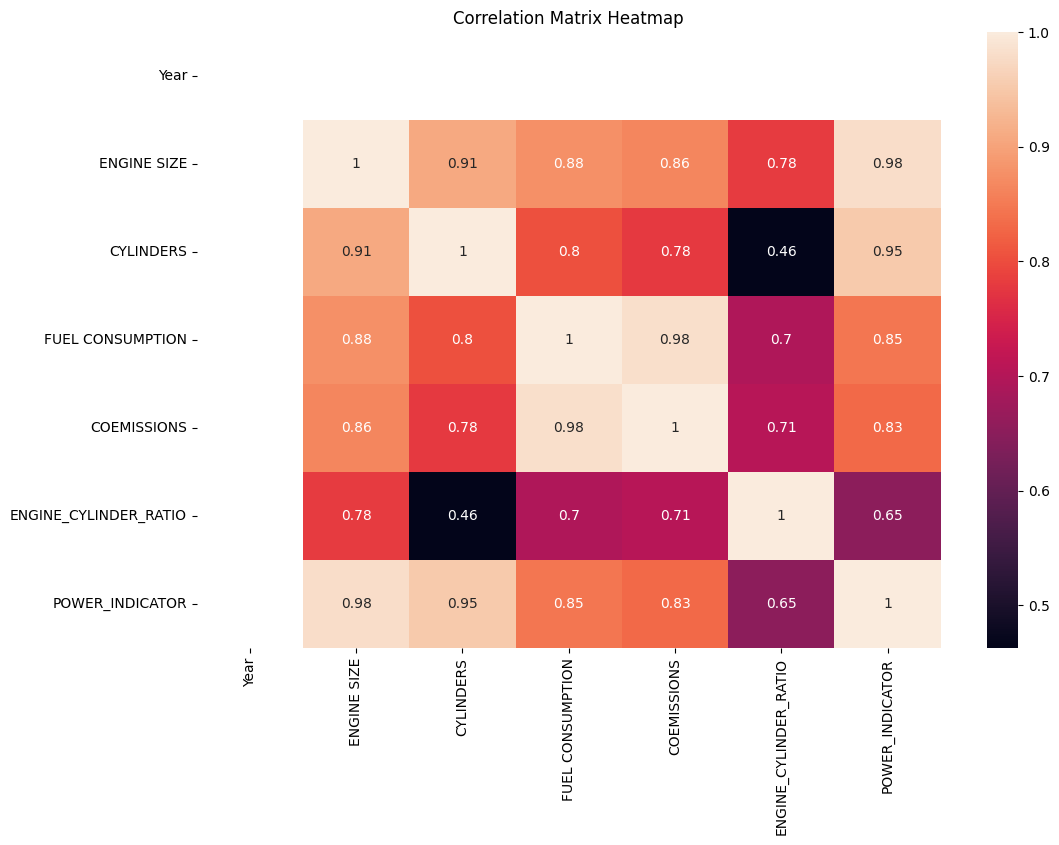

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

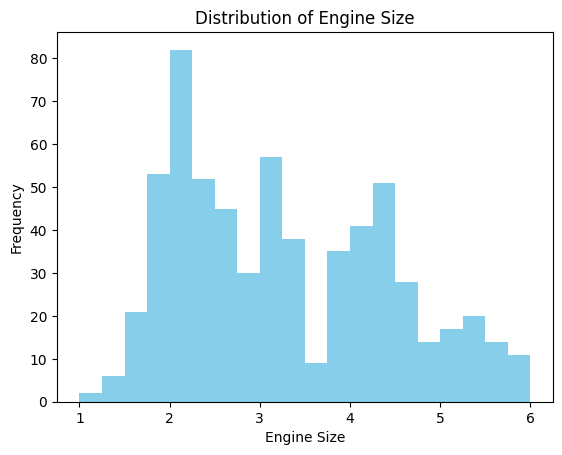

In [265]:
plt.hist(data['ENGINE SIZE'], bins=20, color='skyblue')
plt.title('Distribution of Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Frequency')
plt.show()

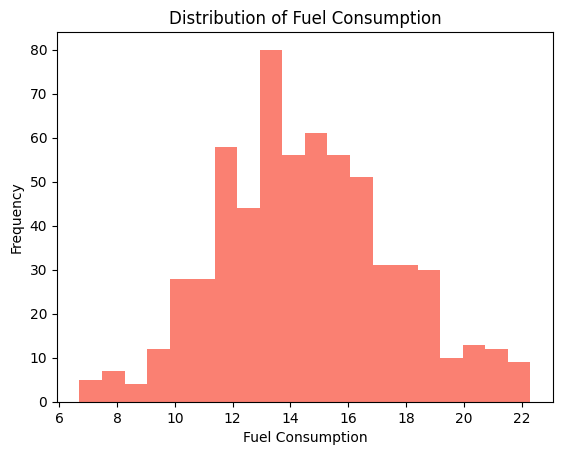

In [266]:
plt.hist(data['FUEL CONSUMPTION'], bins=20, color='salmon')
plt.title('Distribution of Fuel Consumption')
plt.xlabel('Fuel Consumption')
plt.ylabel('Frequency')
plt.show()

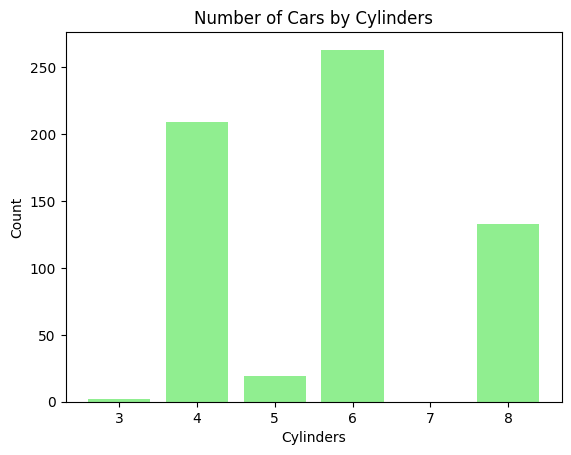

In [267]:
cylinder_counts = data['CYLINDERS'].value_counts()  # count of each cylinder
plt.bar(cylinder_counts.index, cylinder_counts.values, color='lightgreen')
plt.title('Number of Cars by Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.show()

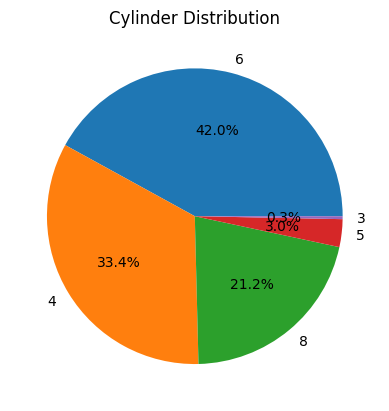

In [268]:
import matplotlib.pyplot as plt
plt.pie(cylinder_counts.values, labels=cylinder_counts.index, autopct='%1.1f%%')
plt.title('Cylinder Distribution')
plt.show()


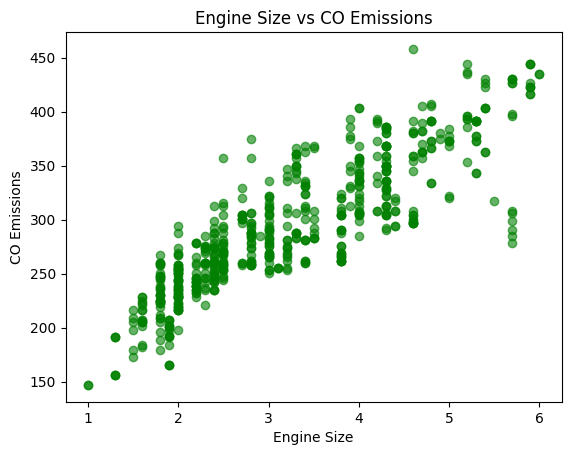

In [269]:
plt.scatter(data['ENGINE SIZE'], data['COEMISSIONS'], alpha=0.6, color='green')
plt.title('Engine Size vs CO Emissions')
plt.xlabel('Engine Size')
plt.ylabel('CO Emissions')
plt.show()

"--- Encoding ---"

In [270]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL']

encoder = OneHotEncoder(drop='first', dtype=int)

encoded_array = encoder.fit_transform(data[categorical_cols]).toarray()

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

data_encoded = pd.concat([data.drop(columns=categorical_cols).reset_index(drop=True),
                          encoded_df.reset_index(drop=True)], axis=1)

print("One Hot Encoding applied successfully.")
print("Shape after encoding:", data_encoded.shape)

One Hot Encoding applied successfully.
Shape after encoding: (626, 382)


In [271]:
data = data_encoded

In [272]:
print(data)

     Year  ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  COEMISSIONS  \
0    2000          1.6          4              10.5          216   
1    2000          1.6          4               9.8          205   
2    2000          3.2          6              13.7          265   
3    2000          3.5          6              15.0          301   
4    2000          1.8          4              11.4          230   
..    ...          ...        ...               ...          ...   
621  2000          2.4          5              14.4          288   
622  2000          2.4          5              13.6          274   
623  2000          2.3          5              13.9          274   
624  2000          2.3          5              13.0          260   
625  2000          2.4          5              14.7          299   

     ENGINE_CYLINDER_RATIO  POWER_INDICATOR  MAKE_AUDI  MAKE_BMW  MAKE_BUICK  \
0                 0.400000              6.4          0         0           0   
1                 0.400

In [273]:
  data = data.drop(columns='Year')

In [274]:
print(data)

     ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  COEMISSIONS  \
0            1.6          4              10.5          216   
1            1.6          4               9.8          205   
2            3.2          6              13.7          265   
3            3.5          6              15.0          301   
4            1.8          4              11.4          230   
..           ...        ...               ...          ...   
621          2.4          5              14.4          288   
622          2.4          5              13.6          274   
623          2.3          5              13.9          274   
624          2.3          5              13.0          260   
625          2.4          5              14.7          299   

     ENGINE_CYLINDER_RATIO  POWER_INDICATOR  MAKE_AUDI  MAKE_BMW  MAKE_BUICK  \
0                 0.400000              6.4          0         0           0   
1                 0.400000              6.4          0         0           0   
2              

In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Columns: 381 entries, ENGINE SIZE to FUEL_Z
dtypes: float64(4), int64(377)
memory usage: 1.8 MB


In [276]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [277]:
lr =  LinearRegression()


In [278]:
print(data.columns)

Index(['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS',
       'ENGINE_CYLINDER_RATIO', 'POWER_INDICATOR', 'MAKE_AUDI', 'MAKE_BMW',
       'MAKE_BUICK', 'MAKE_CADILLAC',
       ...
       'TRANSMISSION_A4', 'TRANSMISSION_A5', 'TRANSMISSION_AS4',
       'TRANSMISSION_AS5', 'TRANSMISSION_M5', 'TRANSMISSION_M6', 'FUEL_E',
       'FUEL_N', 'FUEL_X', 'FUEL_Z'],
      dtype='object', length=381)


In [279]:
feature_cols = [col for col in data.columns if col != 'COEMISSIONS']


In [280]:
x = data[feature_cols]
y = data['COEMISSIONS']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [281]:
lr.fit(x_train, y_train)


LinearRegression()

In [282]:
print(x.shape)


(626, 380)


In [283]:
print(y.shape)


(626,)


In [284]:
print(x_train.shape)

(500, 380)


In [285]:
y_pred = lr.predict(x_test)

In [286]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 34.55030354178646
R-squared: 0.9905145593441869
Mean Absolute Error: 3.740265257066074
Root Mean Squared Error: 5.877950624306609


In [287]:
print(lr.score(x_test, y_test))


0.9905145593441869


In [288]:
from sklearn.metrics import r2_score
y_train_pred = lr.predict(x_train)
train_r2 = r2_score(y_train, y_train_pred)

print("Mean Squared Error:", mse)
print("R-squared (Test):", r2)
print("R-squared (Train):", train_r2)

print("--- Overfitting Check ---")
r2_diff = abs(train_r2 - r2)
print("R² difference: " + str(round(r2_diff, 6)))
if r2_diff < 0.05:
    print(" No overfitting detected (difference < 0.05)")
elif r2_diff < 0.10:
    print(" Slight overfitting (difference < 0.10)")
else:
    print(" Overfitting detected (difference > 0.10)")

Mean Squared Error: 34.55030354178646
R-squared (Test): 0.9905145593441869
R-squared (Train): 0.9985014775931682
--- Overfitting Check ---
R² difference: 0.007987
 No overfitting detected (difference < 0.05)


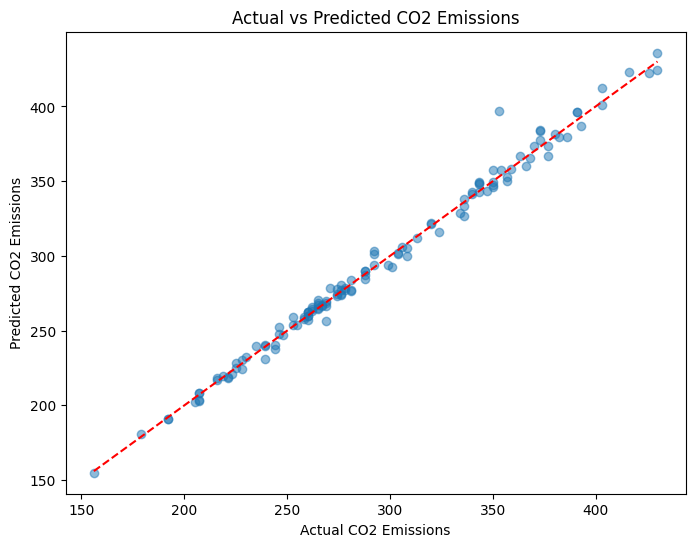

In [289]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

knn

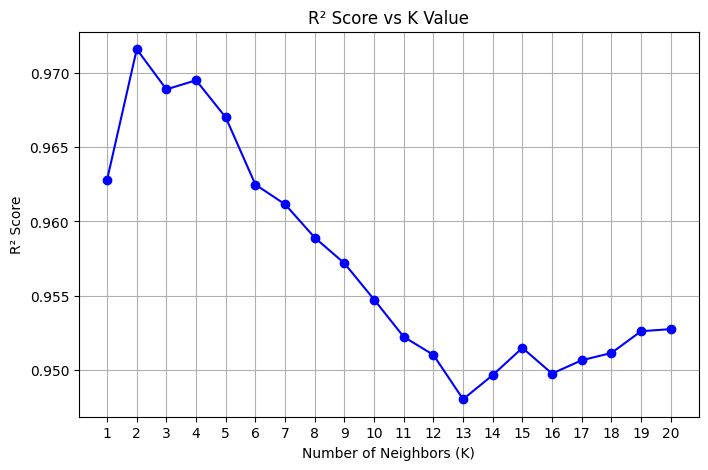

Best K value: 2
Highest R² Score: 0.9716068979266782


In [290]:

from sklearn.neighbors import KNeighborsRegressor

r2_scores = []

for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    score = r2_score(y_test, y_pred)
    r2_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(1, 21), r2_scores, marker='o', color='b')
plt.title("R² Score vs K Value")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("R² Score")
plt.grid(True)

plt.xticks(range(1, 21))

plt.show()

best_k = r2_scores.index(max(r2_scores)) + 1
print("Best K value:", best_k)
print("Highest R² Score:", max(r2_scores))


In [291]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

print("KNN Regressor Evaluation:")
print("R2 Score:", r2_score(y_test, y_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_knn))


KNN Regressor Evaluation:
R2 Score: 0.9716068979266782
Mean Squared Error: 103.42063492063492


Decisison Tree

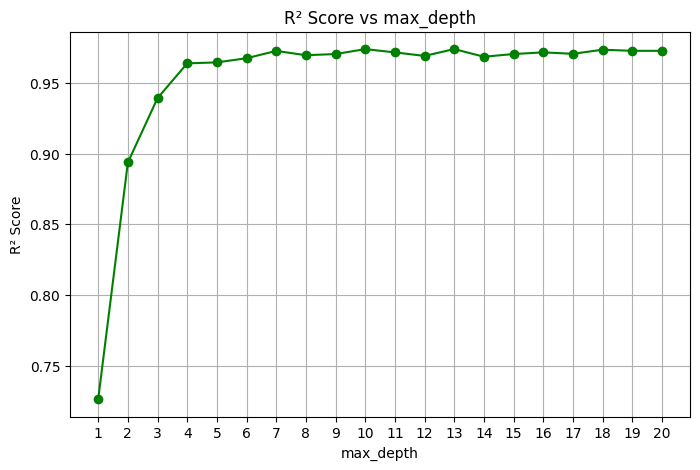

Best max_depth: 13
Highest R² Score: 0.9738715440932222


In [292]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

r2_scores = []

for depth in range(1, 21):
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = r2_score(y_test, y_pred)
    r2_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(1, 21), r2_scores, marker='o', linestyle='-', color='green')
plt.title("R² Score vs max_depth")
plt.xlabel("max_depth")
plt.ylabel("R² Score")
plt.grid(True)
plt.xticks(range(1, 21))
plt.show()

best_depth = r2_scores.index(max(r2_scores)) + 1
print("Best max_depth:", best_depth)
print("Highest R² Score:", max(r2_scores))


In [293]:
dt_best = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
dt_best.fit(x_train, y_train)

y_pred_best = dt_best.predict(x_test)
print("Decision Tree Regressor (Best Depth) Evaluation:")
print("R2 Score:", r2_score(y_test, y_pred_best))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_best))


Decision Tree Regressor (Best Depth) Evaluation:
R2 Score: 0.9738715440932222
Mean Squared Error: 95.1717601126009


Random Forest

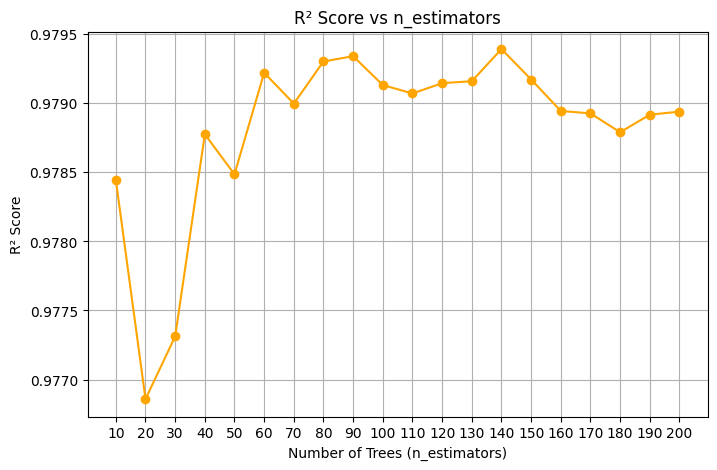

Best n_estimators: 140
Highest R² Score: 0.9793907490733441


In [294]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

r2_scores = []

for n in range(10, 201, 10):
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = r2_score(y_test, y_pred)
    r2_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(10, 201, 10), r2_scores, marker='o', linestyle='-', color='orange')
plt.title("R² Score vs n_estimators")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("R² Score")
plt.grid(True)
plt.xticks(range(10, 201, 10))
plt.show()

best_n = (range(10, 201, 10))[r2_scores.index(max(r2_scores))]
print("Best n_estimators:", best_n)
print("Highest R² Score:", max(r2_scores))


In [295]:
rf_best = RandomForestRegressor(n_estimators=best_n, random_state=42)
rf_best.fit(x_train, y_train)
y_pred_best = rf_best.predict(x_test)
print("Random Forest Regressor (Best Estimators) Evaluation:")
print("R2 Score:", r2_score(y_test, y_pred_best))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_best))


Random Forest Regressor (Best Estimators) Evaluation:
R2 Score: 0.9793907490733441
Mean Squared Error: 75.06829689018463


In [296]:
from sklearn.model_selection import cross_val_score

models = {
    'Linear Regression': LinearRegression(),
    'KNN Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

print("Cross Validation Results (5-Fold):\n")

for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5, scoring='r2')
    print(name + ":")
    print("  Mean R² Score: " + str(round(scores.mean(), 4)))
    print("  Std Deviation: " + str(round(scores.std(), 4)))
    print("----------------------------------------")


Cross Validation Results (5-Fold):

Linear Regression:
  Mean R² Score: 0.9566
  Std Deviation: 0.0327
----------------------------------------
KNN Regressor:
  Mean R² Score: 0.9412
  Std Deviation: 0.015
----------------------------------------
Decision Tree:
  Mean R² Score: 0.9447
  Std Deviation: 0.0469
----------------------------------------
Random Forest:
  Mean R² Score: 0.9612
  Std Deviation: 0.0325
----------------------------------------


In [297]:
import pandas as pd

results = {
    "Model": ["Linear Regression", "KNN Regressor", "Decision Tree Regressor", "Random Forest Regressor"],
    "R2 Score": [0.9905, 0.9716, 0.9738, 0.9793],
    "Mean Squared Error": [34.55, 103.42, 95.17, 75.06]
}

result_df = pd.DataFrame(results)

print("Final Model Performance Comparison:\n")
print(result_df)

best_model = result_df.loc[result_df["R2 Score"].idxmax(), "Model"]
print("Best Performing Model Based on R² Score:", best_model)


Final Model Performance Comparison:

                     Model  R2 Score  Mean Squared Error
0        Linear Regression    0.9905               34.55
1            KNN Regressor    0.9716              103.42
2  Decision Tree Regressor    0.9738               95.17
3  Random Forest Regressor    0.9793               75.06
Best Performing Model Based on R² Score: Linear Regression


In [298]:
import pickle

pickle.dump(encoder, open('encoder.pkl', 'wb'))

filename = 'linear_regression_fuel_data.pkl'
pickle.dump(lr, open(filename, 'wb'))

print("Model saved successfully as linear_regression_fuel_data.pkl")


Model saved successfully as linear_regression_fuel_data.pkl


In [299]:
print(data.columns.tolist())


['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS', 'ENGINE_CYLINDER_RATIO', 'POWER_INDICATOR', 'MAKE_AUDI', 'MAKE_BMW', 'MAKE_BUICK', 'MAKE_CADILLAC', 'MAKE_CHEVROLET', 'MAKE_CHRYSLER', 'MAKE_DAEWOO', 'MAKE_DODGE', 'MAKE_FORD', 'MAKE_GMC', 'MAKE_HONDA', 'MAKE_HYUNDAI', 'MAKE_INFINITI', 'MAKE_ISUZU', 'MAKE_JAGUAR', 'MAKE_JEEP', 'MAKE_KIA', 'MAKE_LAND ROVER', 'MAKE_LEXUS', 'MAKE_LINCOLN', 'MAKE_MAZDA', 'MAKE_MERCEDES-BENZ', 'MAKE_NISSAN', 'MAKE_OLDSMOBILE', 'MAKE_PLYMOUTH', 'MAKE_PONTIAC', 'MAKE_PORSCHE', 'MAKE_SAAB', 'MAKE_SATURN', 'MAKE_SUBARU', 'MAKE_SUZUKI', 'MAKE_TOYOTA', 'MAKE_VOLKSWAGEN', 'MAKE_VOLVO', 'MODEL_3.2TL', 'MODEL_3.5RL', 'MODEL_300M', 'MODEL_323 CONVERTIBLE', 'MODEL_323Ci', 'MODEL_323i', 'MODEL_328Ci', 'MODEL_328i', 'MODEL_4RUNNER 4X4', 'MODEL_528i', 'MODEL_528i TOURING', 'MODEL_540i', 'MODEL_540i TOURING', 'MODEL_626', 'MODEL_740i', 'MODEL_740iL', 'MODEL_9-3 TURBO', 'MODEL_9-5 TURBO', 'MODEL_9-5 WAGON TURBO', 'MODEL_911 CARRERA', 'MODEL_911 CARRERA 4', 'MO

In [300]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('encoder', encoder),
    ('model', lr)
])

import pickle
pickle.dump(pipeline, open('pipeline_model.pkl', 'wb'))


In [301]:
from google.colab import files
files.download('linear_regression_fuel_data.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>